In [205]:
import yfinance as yf
import numpy as np

In [206]:
df = yf.download('AAPL', start = '2010-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [207]:
df['returns'] = np.log(df.Close.pct_change()+1)

In [208]:
df.returns

Date
2010-01-04         NaN
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
                ...   
2023-12-22   -0.005563
2023-12-26   -0.002845
2023-12-27    0.000518
2023-12-28    0.002224
2023-12-29   -0.005439
Name: returns, Length: 3522, dtype: float64

In [209]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [210]:
def lagit(df, lags):
  names = []
  for i in range(1, lags + 1):
    df['Lag_' + str(i)] = df['returns'].shift(i)
    df['Lag_' + str(i) + '_dir'] = [1 if j > 0 else -1 for j in df['Lag_' + str(i)]]
    names.append('Lag_'+str(i)+'_dir')
  return names

In [211]:
dirnames = lagit(df, 5)

In [212]:
dirnames

['Lag_1_dir', 'Lag_2_dir', 'Lag_3_dir', 'Lag_4_dir', 'Lag_5_dir']

In [213]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,Lag_3,Lag_3_dir,Lag_4,Lag_4_dir,Lag_5,Lag_5_dir
Date,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800,0.001727,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000,-0.016034,-1,0.001727,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200,-0.001850,-1,-0.016034,-1,0.001727,1,NaN,-1,NaN,-1,NaN,-1
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400683,447610800,0.006626,1,-0.001850,-1,-0.016034,-1,0.001727,1,NaN,-1,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-0.005563,-1,-0.000770,-1,-0.010772,-1,0.005346,1,-0.008540,-1,-0.002729,-1
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,-0.002845,-1,-0.005563,-1,-0.000770,-1,-0.010772,-1,0.005346,1,-0.008540,-1
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.000518,1,-0.002845,-1,-0.005563,-1,-0.000770,-1,-0.010772,-1,0.005346,1


In [214]:
df.dropna(inplace = True)

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
model = LogisticRegression()

In [217]:
model.fit(df[dirnames], df['direction'])

LogisticRegression()

In [218]:
df['prediction_Logistic'] = model.predict(df[dirnames])

In [219]:
df['prediction_Logistic']

Date
2010-01-12    1
2010-01-13    1
2010-01-14    1
2010-01-15    1
2010-01-19    1
             ..
2023-12-22    1
2023-12-26    1
2023-12-27    1
2023-12-28    1
2023-12-29    1
Name: prediction_Logistic, Length: 3516, dtype: int64

In [220]:
df['start_Logistic'] = df['prediction_Logistic'] * df['returns']

In [221]:
np.exp(df[['returns', 'start_Logistic']].sum())

returns           25.657225
start_Logistic    44.910114
dtype: float64

<Axes: xlabel='Date'>

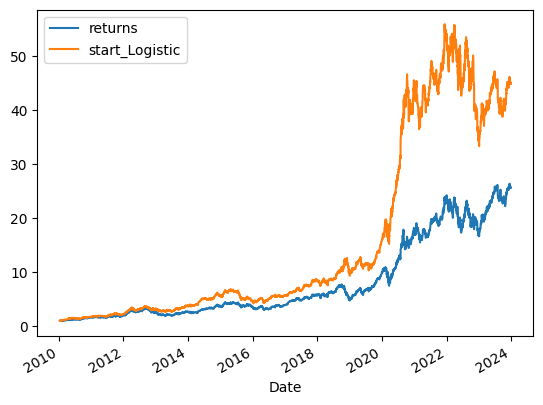

In [222]:
np.exp(df[['returns', 'start_Logistic']].cumsum()).plot()

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
train, test = train_test_split(df, shuffle = False, test_size = 0.3, random_state = 0)

In [225]:
model = LogisticRegression()

In [226]:
model.fit(train[dirnames], train['direction'])

LogisticRegression()

In [227]:
test['prediction_Logistic'] = model.predict(test[dirnames])

In [228]:
test['strat_Logistic'] = test['prediction_Logistic'] * test['returns']

In [229]:
np.exp(test[['returns', 'strat_Logistic']].sum())

returns           3.202029
strat_Logistic    2.269089
dtype: float64

In [230]:
(test['direction'].diff() != 0).value_counts()

direction
True     549
False    506
Name: count, dtype: int64

<Axes: xlabel='Date'>

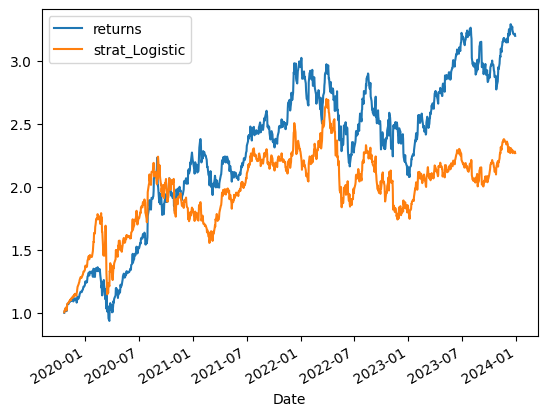

In [231]:
np.exp(test[['returns', 'strat_Logistic']].cumsum()).plot()

In [232]:
from sklearn import metrics

In [233]:
metrics.confusion_matrix(test['direction'], test['prediction_Logistic'])

array([[ 85, 411],
       [ 86, 473]])

In [234]:
print(metrics.classification_report(test['direction'], test['prediction_Logistic']))

              precision    recall  f1-score   support

          -1       0.50      0.17      0.25       496
           1       0.54      0.85      0.66       559

    accuracy                           0.53      1055
   macro avg       0.52      0.51      0.46      1055
weighted avg       0.52      0.53      0.47      1055

